<a href="https://colab.research.google.com/github/sksuman97/TAXI-MOBILITY-SURGE-PRICE-PREDICTION/blob/main/ML_Projects_I_TAXI_MOBILITY_SURGE_PRICE_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAXI MOBILITY SURGE PRICE PREDICTION

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download
their app on smartphones and book a cab from anywhere in the cities they operate in. They, in
turn, search for cabs from various service providers and provide the best option to their clients
across available options. They have been in operation for a little less than a year now. During this
period, they have captured surge pricing types from the service providers.
The main objective is to build a predictive model, which could help them in predicting the surge
pricing type proactively. This would in turn help them in matching the right cabs with the right
customers quickly and efficiently.

</br>

● Trip_ID: ID for TRIP

● Trip_Distance: The distance for the trip requested by the customer

● TypeofCab: Category of the cab requested by the customer

● CustomerSinceMonths: Customer using cab services since n months; 0 month means
the current month

● LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour

● ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

● Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.

● Customer_Rating: Average of lifetime ratings of the customer till date

● CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

● Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for

modelling purposes

● Gender: Gender of the customer

● SurgePricingType: Target (can be of 3 types) - DV

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df=pd.read_csv("/content/drive/MyDrive/Capstone Projects/TAXI MOBILITY SURGE PRICE PREDICTION/Taxi Mobility Surge Price Prediction-20210510T143336Z-001/Taxi Mobility Surge Price Prediction/data_sigma_cabs.csv")

In [39]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [40]:
cop=df.copy()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [14]:
df.duplicated().sum()

0

# Exploratory data analysis

In [42]:
df.drop(columns=['Trip_ID'],inplace=True)

In [43]:
def nan_check(data):
  '''creating a function that will show percentage of null values in each column'''
  total = data.isnull().sum().sort_values(ascending=False)
  percent_1 = data.isnull().sum()/data.isnull().count()*100
  percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
  missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
  return missing_data

nan_check(df)

,Total,%
Var1,71030,53.9
Type_of_Cab,20210,15.3
Confidence_Life_Style_Index,20193,15.3
Life_Style_Index,20193,15.3
Customer_Since_Months,5920,4.5
Surge_Pricing_Type,0,0.0
Gender,0,0.0
Var3,0,0.0
Var2,0,0.0
Cancellation_Last_1Month,0,0.0


### Drop Var1 

In [44]:
df.drop(columns=['Var1'],inplace=True)

### Plotting pairplot

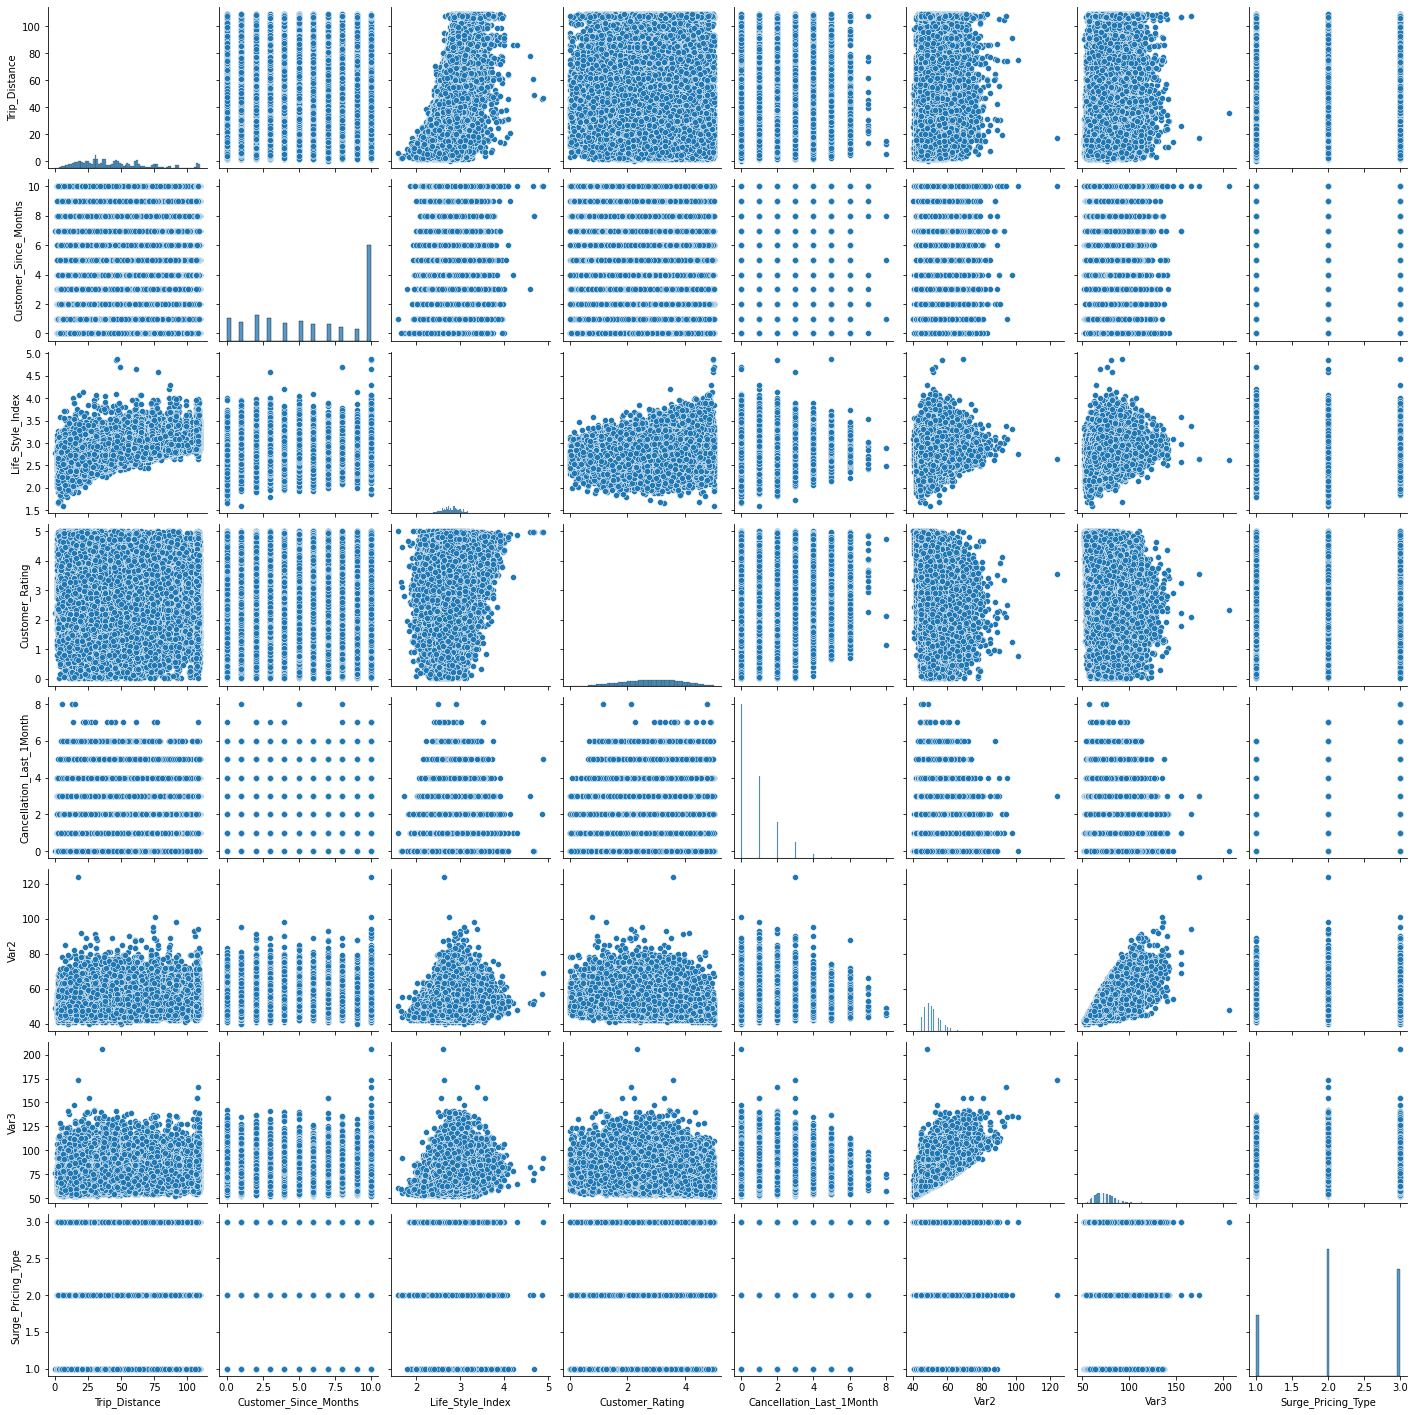

In [45]:
sns.pairplot(df)

## Var2 and var 3 are linearly correlated

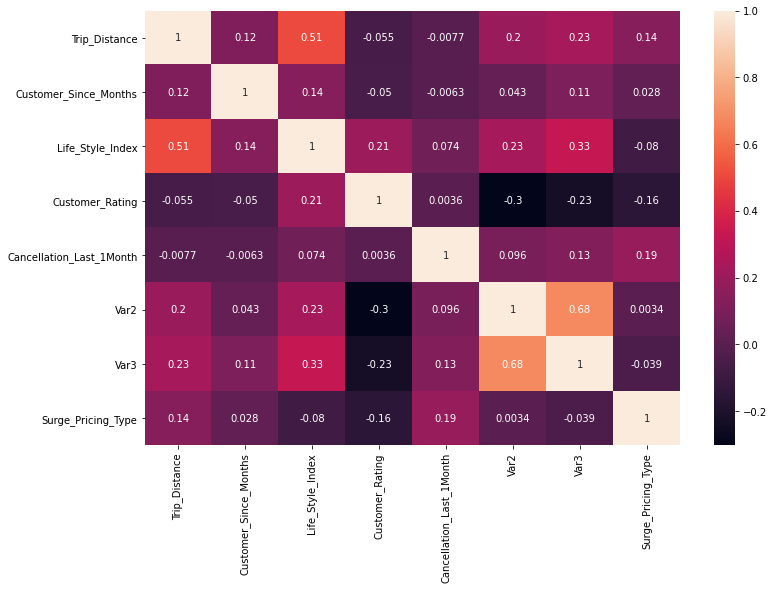

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [47]:
df['Life_Style_Index'].value_counts()

2.70697    14
2.77608    14
2.78465    13
2.69489    12
2.77447    12
           ..
2.64184     1
2.97707     1
2.90484     1
3.19257     1
2.10775     1
Name: Life_Style_Index, Length: 55978, dtype: int64

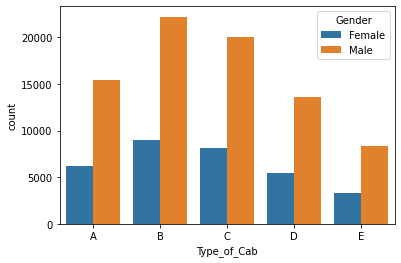

In [48]:
sns.countplot(x ='Type_of_Cab', data = df,order=['A','B','C','D','E'],hue='Gender')

## Average priced cars are more preferred than very cheap and expensive cabs.

In [49]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

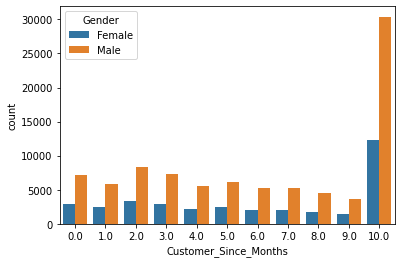

In [50]:
sns.countplot(x='Customer_Since_Months',data=df,hue='Gender')

In [51]:
42680/88982

0.4796475691712931

In [ ]:
df['Customer_Since_Months'].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

# Most of customers are old customers

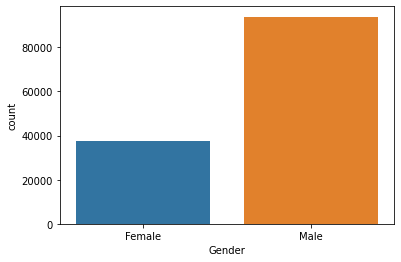

In [52]:
sns.countplot(x='Gender',data=df)

Males are using more cabs than Female.
[link](https://www.insidehook.com/daily_brief/news-opinion/study-finds-men-tip-uber-drivers-more-than-women)

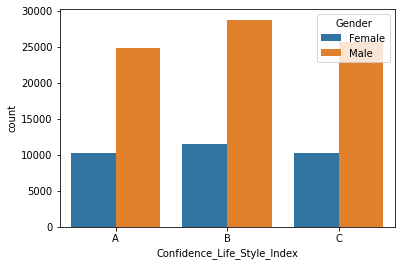

In [53]:
sns.countplot(x='Confidence_Life_Style_Index',data=df,hue='Gender')

In [54]:
df['Cancellation_Last_1Month'].value_counts()

0    68687
1    36834
2    16223
3     7142
4     1823
5      668
6      266
7       16
8        3
Name: Cancellation_Last_1Month, dtype: int64

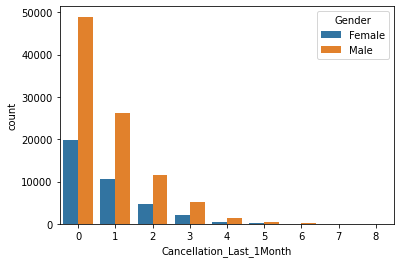

In [55]:
sns.countplot(x='Cancellation_Last_1Month',data=df,hue='Gender')

### TARGET VARIABLE

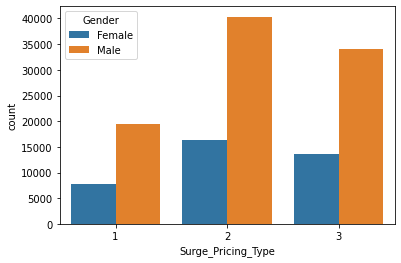

In [56]:
sns.countplot(x ='Surge_Pricing_Type', data = df,hue='Gender')

Class one has less number of datapoints than other two classes.

In [57]:
df['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

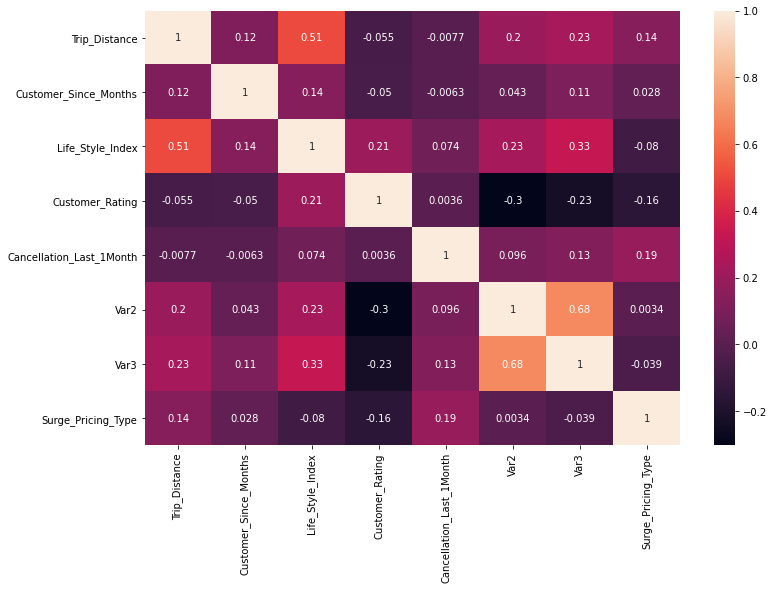

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

*   Var2 qnd var3 are showing high correlation. 
*   But var3 is contributting very less to target variable




In [59]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

In [60]:
nan_check(df)

,Total,%
Type_of_Cab,20210,15.3
Confidence_Life_Style_Index,20193,15.3
Life_Style_Index,20193,15.3
Customer_Since_Months,5920,4.5
Surge_Pricing_Type,0,0.0
Gender,0,0.0
Var3,0,0.0
Var2,0,0.0
Cancellation_Last_1Month,0,0.0
Customer_Rating,0,0.0


In [65]:
df.dropna(inplace=True)

In [23]:
# Drop var3 column
# df.drop(columns=['Var3'],axis=1,inplace=True)

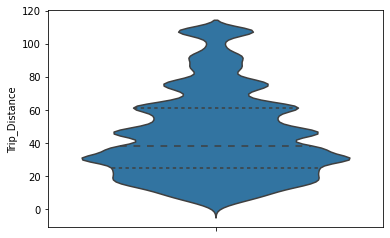

In [66]:
sns.violinplot(y='Trip_Distance',data=df,inner='quartile')

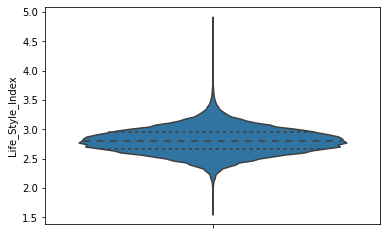

In [67]:
sns.violinplot(y='Life_Style_Index',data=df,inner='quartile')

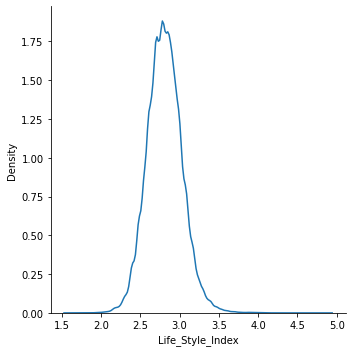

In [68]:
sns.displot(df, x="Life_Style_Index", kind="kde")

In [69]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

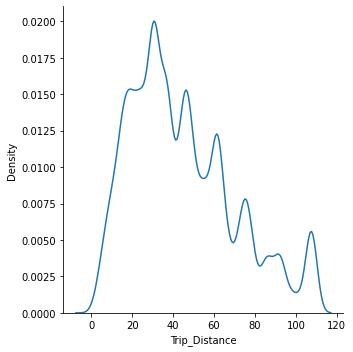

In [70]:
# df.info()
sns.displot(df, x="Trip_Distance", kind="kde")

In [71]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [72]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90052 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_Distance                90052 non-null  float64
 1   Type_of_Cab                  90052 non-null  object 
 2   Customer_Since_Months        90052 non-null  float64
 3   Life_Style_Index             90052 non-null  float64
 4   Confidence_Life_Style_Index  90052 non-null  object 
 5   Destination_Type             90052 non-null  object 
 6   Customer_Rating              90052 non-null  float64
 7   Cancellation_Last_1Month     90052 non-null  int64  
 8   Var2                         90052 non-null  int64  
 9   Var3                         90052 non-null  int64  
 10  Gender                       90052 non-null  object 
 11  Surge_Pricing_Type           90052 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ MB


In [74]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Surge_Pricing_Type']]].dropna())

,variables,VIF
0,Trip_Distance,4.977708
1,Customer_Since_Months,3.869406
2,Life_Style_Index,146.175699
3,Customer_Rating,11.974078
4,Cancellation_Last_1Month,1.599475
5,Var2,154.461346
6,Var3,85.626455


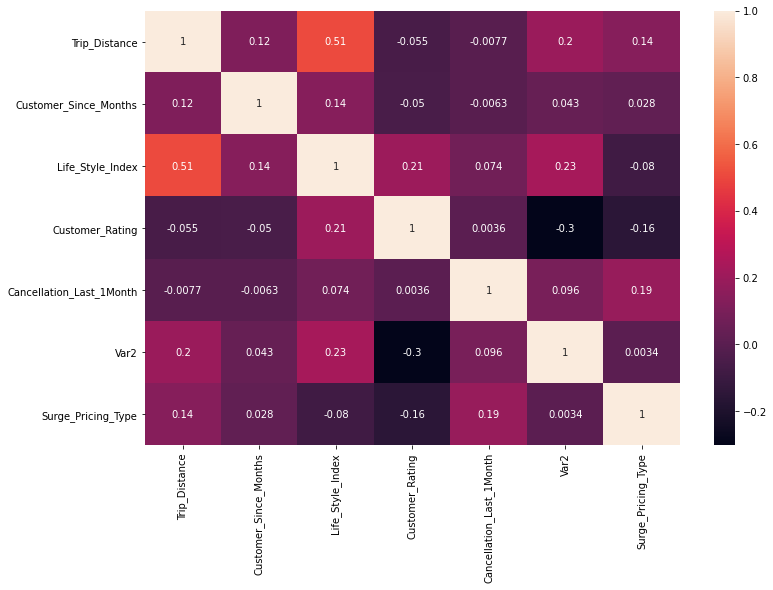

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
!pip install pywedge

In [ ]:
import pywedge as pw

In [ ]:
mc = pw.Pywedge_Charts(df, c=None, y = 'Surge_Pricing_Type')

In [ ]:
charts = mc.make_charts()

In [ ]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3', 'Gender',
       'Surge_Pricing_Type'],
      dtype='object')

## Feature making

Decision Trees

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90052 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_Distance                90052 non-null  float64
 1   Type_of_Cab                  90052 non-null  object 
 2   Customer_Since_Months        90052 non-null  float64
 3   Life_Style_Index             90052 non-null  float64
 4   Confidence_Life_Style_Index  90052 non-null  object 
 5   Destination_Type             90052 non-null  object 
 6   Customer_Rating              90052 non-null  float64
 7   Cancellation_Last_1Month     90052 non-null  int64  
 8   Var2                         90052 non-null  int64  
 9   Var3                         90052 non-null  int64  
 10  Gender                       90052 non-null  object 
 11  Surge_Pricing_Type           90052 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ MB


In [78]:
# Converting Gender column into numerical features
x={'Female':0,'Male':1}

df['Gender']=df['Gender'].map(x)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90052 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_Distance                90052 non-null  float64
 1   Type_of_Cab                  90052 non-null  object 
 2   Customer_Since_Months        90052 non-null  float64
 3   Life_Style_Index             90052 non-null  float64
 4   Confidence_Life_Style_Index  90052 non-null  object 
 5   Destination_Type             90052 non-null  object 
 6   Customer_Rating              90052 non-null  float64
 7   Cancellation_Last_1Month     90052 non-null  int64  
 8   Var2                         90052 non-null  int64  
 9   Var3                         90052 non-null  int64  
 10  Gender                       90052 non-null  object 
 11  Surge_Pricing_Type           90052 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ MB


In [79]:
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.9050,0,46,60,0,2
1,29.47,B,10.0,2.78245,B,A,3.4500,0,56,78,1,2
4,54.95,C,10.0,3.03453,B,A,3.4025,4,49,102,1,2
6,29.72,E,10.0,2.83958,C,B,2.9750,1,50,75,1,2
7,18.44,B,2.0,2.81871,B,A,3.5825,0,46,63,1,2


In [90]:
# One hot encoding
df= pd.get_dummies(df, columns=["Type_of_Cab", "Confidence_Life_Style_Index","Destination_Type"], prefix=["cab_type", "conf_index","destination_type"],drop_first=True)

In [91]:
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,cab_type_B,cab_type_C,cab_type_D,cab_type_E,conf_index_B,conf_index_C,destination_type_B,destination_type_C,destination_type_D,destination_type_E,destination_type_F,destination_type_G,destination_type_H,destination_type_I,destination_type_J,destination_type_K,destination_type_L,destination_type_M,destination_type_N
0,6.77,1.0,2.42769,3.9050,0,46,60,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.4500,0,56,78,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.95,10.0,3.03453,3.4025,4,49,102,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,29.72,10.0,2.83958,2.9750,1,50,75,1,2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,18.44,2.0,2.81871,3.5825,0,46,63,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90052 entries, 0 to 131661
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trip_Distance             90052 non-null  float64
 1   Customer_Since_Months     90052 non-null  float64
 2   Life_Style_Index          90052 non-null  float64
 3   Customer_Rating           90052 non-null  float64
 4   Cancellation_Last_1Month  90052 non-null  int64  
 5   Var2                      90052 non-null  int64  
 6   Var3                      90052 non-null  int64  
 7   Gender                    90052 non-null  int64  
 8   Surge_Pricing_Type        90052 non-null  int64  
 9   cab_type_B                90052 non-null  uint8  
 10  cab_type_C                90052 non-null  uint8  
 11  cab_type_D                90052 non-null  uint8  
 12  cab_type_E                90052 non-null  uint8  
 13  conf_index_B              90052 non-null  uint8  
 14  conf_

In [93]:
X=df[[i for i in df.columns if i not in ['Surge_Pricing_Type']]]
y=df['Surge_Pricing_Type']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

## Model Deployment

##Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression as LR

In [155]:
lr_model=LR(solver='sag',multi_class='ovr')

In [156]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
## Accuracy on training data
accuracy_score(y_train, lr_model.predict(X_train))

0.7245443373458298

In [157]:
# Accuracy on testing data
y_pred_lr=lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))

Accuracy: 71.95%


## XGboost

In [123]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [108]:
#Importing xgboost classifiers
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix

In [96]:
X_train.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,cab_type_B,cab_type_C,cab_type_D,cab_type_E,conf_index_B,conf_index_C,destination_type_B,destination_type_C,destination_type_D,destination_type_E,destination_type_F,destination_type_G,destination_type_H,destination_type_I,destination_type_J,destination_type_K,destination_type_L,destination_type_M,destination_type_N
104430,75.47,4.0,3.02254,3.18500,0,61,89,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
49460,37.79,2.0,3.27912,3.91375,2,56,78,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
117059,18.03,10.0,3.17715,2.51875,1,55,88,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
122324,43.78,10.0,3.02357,1.80250,1,54,80,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120453,45.05,10.0,2.81000,3.62000,1,47,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
# fit model no training data
model1 = XGBClassifier(booster='dart', max_depth=30)
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [118]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [119]:
# Training accuracy
accuracy_score(y_train, model.predict(X_train))

1.0

In [112]:
y_pred

array([2, 2, 3, ..., 3, 1, 3])

In [120]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.91%


In [121]:
precision_score(y_test,y_pred,average='micro')

0.7190956336339004

In [122]:
recall_score(y_test,y_pred,average='micro')

0.7190956336339004

In [109]:
confusion_matrix(y_test,y_pred)

array([[2836, 1182,  536],
       [ 404, 7968, 1357],
       [ 581, 2065, 5584]])

# Hyperparameter tunning


##Bayesian Optimization using Hyperopt

In [231]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


space={'max_depth': hp.quniform("max_depth", 9, 18, 1),
        'gamma': hp.uniform ('gamma', 2,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }




In [232]:

    
# Classifier:
def hyperparameter_tuning(space):
    model = XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'])
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    model.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

In [233]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = space['max_depth'], gamma = space['gamma'],
                    reg_alpha = space['reg_alpha'],min_child_weight=space['min_child_weight'],
                    colsample_bytree=space['colsample_bytree'],objective='multi:softmax')
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric='mlogloss',
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


In [215]:
X_test.shape

(22513, 27)

In [ ]:
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print (best)

SCORE:
0.7285124150490827
SCORE:
0.728556833829343
SCORE:
0.7290454404122063
SCORE:
0.7292231155332475
SCORE:
0.7278905521254386
SCORE:
0.727179851641274
SCORE:
0.7267356638386709
SCORE:
0.7292231155332475
SCORE:
0.7267356638386709
SCORE:
0.7284235774885621
SCORE:
0.7303335850397548
SCORE:
0.7287789277306446
SCORE:
0.7278905521254386
SCORE:
0.7308221916226181
SCORE:
0.7308666104028784
SCORE:
0.7282903211477812
SCORE:
0.7264247323768489
SCORE:
0.7289121840714254
SCORE:
0.7277572957846578
SCORE:
0.730378003820015
SCORE:
0.7301114911384533
SCORE:
0.7273575267623151
SCORE:
0.7301559099187136
SCORE:
0.7311775418647004
SCORE:
0.728690090170124
SCORE:
0.7311775418647004
SCORE:
0.730378003820015
SCORE:
0.7291342779727269
SCORE:
0.7302891662594945
SCORE:
0.7298893972371518
SCORE:
0.7305556789410563
SCORE:
0.7301114911384533
SCORE:
0.728556833829343
SCORE:
0.7278905521254386
SCORE:
0.7302003286989739
SCORE:
0.7272686892017945
SCORE:
0.7301559099187136
SCORE:
0.7272686892017945
SCORE:
0.730822191

### Even by using hyperparameter tunning, we are not achieving that much change in scores

In [223]:
!pip install bayesian-optimization

In [226]:
import numpy as np
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}

def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc'))

optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1,
)